In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# Preparing and Transforming Data

In [6]:
data = pd.read_csv('bike_train_data.csv')
data = data.rename({'count':'count_col'},axis=1)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count_col
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
data['season'] = data['season'].map({  1:'spring', 2:'summer', 3:'fall', 4:'winter' })

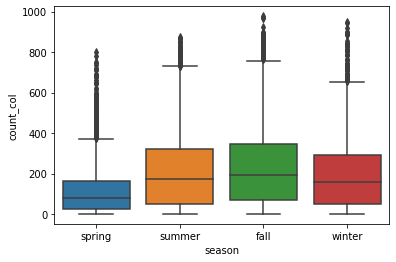

In [9]:
#show_season_as_boxplot
sns.boxplot(x='season', y='count_col', data=data)
plt.show()

In [11]:
print('Means of Counts col by Each Season:')
data.groupby('season')['count_col'].agg(['mean','std'])

Means of Counts col by Each Season:


,mean,std
season,,
fall,234.417124,197.151001
spring,116.343261,125.273974
summer,215.251372,192.007843
winter,198.988296,177.622409


In [12]:
data['season'] = data['season'].astype('category')
season_map = dict(enumerate(data['season'].cat.categories))
data['season'] = data['season'].cat.codes

season_map

{0: 'fall', 1: 'spring', 2: 'summer', 3: 'winter'}

# Anova Test

In [13]:
print('Fit an OLS Regression:')
model = smf.ols(formula='count_col ~ C(season)', data=data).fit()
print (model.summary())

Fit an OLS Regression:
                            OLS Regression Results                            
Dep. Variable:              count_col   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          6.16e-149
Time:                        13:28:55   Log-Likelihood:                -71701.
No. Observations:               10886   AIC:                         1.434e+05
Df Residuals:                   10882   BIC:                         1.434e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        234.

### ANOVA test Inference:
The p-value of the test is 6.16e-149(approximately 0), we fail to accept the Null Hypothesis and infer that the count of rentals on an avergae do differ for each season.

#  Tukey HSD Test

In [14]:
print('----Tukey Test Post Hoc----')
model2= multi.MultiComparison(data['count_col'], data['season'])
res1 = model2.tukeyhsd()
print(res1.summary())

----Tukey Test Post Hoc----
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1 -118.0739   -0.0 -130.3276 -105.8202   True
     0      2  -19.1658 0.0003  -31.3662   -6.9653   True
     0      3  -35.4288   -0.0  -47.6282  -23.2295   True
     1      2   98.9081   -0.0   86.6544  111.1618   True
     1      3    82.645   -0.0   70.3924   94.8976   True
     2      3  -16.2631 0.0034  -28.4624   -4.0637   True
---------------------------------------------------------


### Tukey HSD Test  Inference:
The count of rentals actually differ for each pairs of seasons on an average **(reject=true)**.